Attempt create conventional ML processes
1) KNN
2) Decision Tree
3) SVM
4) Logistic Regression

5) ANN?

In [1]:
from pathlib import Path
import os

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score


**Load dataset CSV**

In [2]:
filepath = Path(R"C:\Users\fmazl\Documents\ibm\volve\test\samples\combines\output\1.csv")

df = pd.read_csv(filepath)
df.head()

,TIME - s,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class
0,2007-12-17 05:10:35.040000+00:00,917.789978,909.799988,NaN,9.01,62.080324,0.0,0.0,197.000005,0.0,0,1,0,0,1,1001,in slips
1,2007-12-17 05:10:39.014000+00:00,917.789978,909.799988,NaN,9.01,62.059929,0.0,0.0,195.000008,0.0,0,1,0,0,1,1001,in slips
2,2007-12-17 05:10:44.026000+00:00,917.789978,909.799988,NaN,9.01,62.141505,0.0,0.0,205.999993,0.0,0,1,0,0,1,1001,in slips
3,2007-12-17 05:10:48+00:00,917.789978,909.799988,NaN,9.01,62.263873,0.0,0.0,187.000000,0.0,0,1,0,0,1,1001,in slips
4,2007-12-17 05:10:53.011000+00:00,917.789978,909.799988,NaN,9.01,62.294464,0.0,0.0,185.999999,0.0,0,1,0,0,1,1001,in slips


In [3]:
#data exploration statistics
value_count1 = df['state_class'].value_counts()
value_count1

Rotary Drilling             225072
in slips                    149053
Static                       49162
Ream downwards               21978
Run in hole                  20768
Pull out of hole             17338
Circulate while rotating     16771
Ream upwards                 15000
Wash Downwards               13156
Circulate hole                7740
Sliding Drilling              5850
Wash Upwards                  1849
Rotating only                  418
Pull out only rotating         251
Run in only rotating           248
Name: state_class, dtype: int64

In [4]:
#data exploration statistics
value_count1.cumsum()

Rotary Drilling             225072
in slips                    374125
Static                      423287
Ream downwards              445265
Run in hole                 466033
Pull out of hole            483371
Circulate while rotating    500142
Ream upwards                515142
Wash Downwards              528298
Circulate hole              536038
Sliding Drilling            541888
Wash Upwards                543737
Rotating only               544155
Pull out only rotating      544406
Run in only rotating        544654
Name: state_class, dtype: int64

**Check Data**

In [5]:
# replace NaN to 0
df = df.fillna(0)
# change to date time
df['TIME - s'] = pd.to_datetime(df['TIME - s'])
df

,TIME - s,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class
0,2007-12-17 05:10:35.040000+00:00,917.789978,909.799988,0.0,9.010000,62.080324,0.0,0.00000,197.000005,0.0,0,1,0,0,1,1001,in slips
1,2007-12-17 05:10:39.014000+00:00,917.789978,909.799988,0.0,9.010000,62.059929,0.0,0.00000,195.000008,0.0,0,1,0,0,1,1001,in slips
2,2007-12-17 05:10:44.026000+00:00,917.789978,909.799988,0.0,9.010000,62.141505,0.0,0.00000,205.999993,0.0,0,1,0,0,1,1001,in slips
3,2007-12-17 05:10:48+00:00,917.789978,909.799988,0.0,9.010000,62.263873,0.0,0.00000,187.000000,0.0,0,1,0,0,1,1001,in slips
4,2007-12-17 05:10:53.011000+00:00,917.789978,909.799988,0.0,9.010000,62.294464,0.0,0.00000,185.999999,0.0,0,1,0,0,1,1001,in slips
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544649,2008-12-18 21:33:23.040000+00:00,2591.060059,1535.459961,0.0,16.809999,179.286512,0.0,776.53003,1228.999995,0.0,0,0,1,0,1,101,Wash Downwards
544650,2008-12-18 21:33:27.014000+00:00,2591.060059,1535.459961,0.0,16.809999,179.215124,0.0,776.53003,1243.000028,0.0,0,0,1,0,1,101,Wash Downwards
544651,2008-12-18 21:33:32.026000+00:00,2591.060059,1535.459961,0.0,16.809999,178.939797,0.0,776.53003,1244.999983,0.0,0,0,1,0,1,101,Wash Downwards
544652,2008-12-18 21:33:36+00:00,2591.060059,1535.459961,0.0,16.809999,178.858217,0.0,776.53003,1268.000031,0.0,0,0,1,0,1,101,Wash Downwards


**Pre-processing: Feature selection/extraction**

instead of One Hot Encoding, utilize state as category


In [6]:
Feature = df.iloc[:,1:10]

Define feature sets, X

In [7]:
X = Feature
X[0:5]


,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm
0,917.789978,909.799988,0.0,9.01,62.080324,0.0,0.0,197.000005,0.0
1,917.789978,909.799988,0.0,9.01,62.059929,0.0,0.0,195.000008,0.0
2,917.789978,909.799988,0.0,9.01,62.141505,0.0,0.0,205.999993,0.0
3,917.789978,909.799988,0.0,9.01,62.263873,0.0,0.0,187.000000,0.0
4,917.789978,909.799988,0.0,9.01,62.294464,0.0,0.0,185.999999,0.0


labels

In [8]:
y = df['state_class'].values
y[0:5]

array(['in slips', 'in slips', 'in slips', 'in slips', 'in slips'],
      dtype=object)

**Normalize Data**

Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [9]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.80154517, -0.25199355, -0.49705529, -1.39876521, -1.09766661,
        -0.63949811, -1.13942181, -1.00496806, -0.94127841],
       [-0.80154517, -0.25199355, -0.49705529, -1.39876521, -1.09820229,
        -0.63949811, -1.13942181, -1.00515366, -0.94127841],
       [-0.80154517, -0.25199355, -0.49705529, -1.39876521, -1.09605967,
        -0.63949811, -1.13942181, -1.00413289, -0.94127841],
       [-0.80154517, -0.25199355, -0.49705529, -1.39876521, -1.09284558,
        -0.63949811, -1.13942181, -1.00589604, -0.94127841],
       [-0.80154517, -0.25199355, -0.49705529, -1.39876521, -1.09204211,
        -0.63949811, -1.13942181, -1.00598884, -0.94127841]])

**Classification**

1) KNN

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (435723, 9) (435723,)
Test set: (108931, 9) (108931,)


In [11]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.97707723, 0.96950363, 0.96799809, 0.96674041, 0.96719024,
       0.96581322, 0.96499619, 0.96456472, 0.96358245])

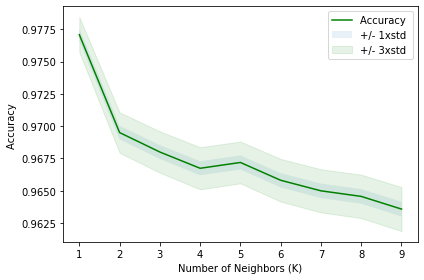

The best accuracy was with 0.9770772323764585 with k= 1


In [12]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [13]:
print(classification_report(y_test,yhat))

                          precision    recall  f1-score   support

          Circulate hole       0.89      0.87      0.88      1536
Circulate while rotating       0.87      0.86      0.87      3405
        Pull out of hole       0.86      0.86      0.86      3446
  Pull out only rotating       0.91      0.89      0.90        46
          Ream downwards       0.88      0.90      0.89      4391
            Ream upwards       0.86      0.84      0.85      3055
         Rotary Drilling       1.00      1.00      1.00     45052
           Rotating only       0.83      0.48      0.61        81
             Run in hole       0.86      0.82      0.84      4085
    Run in only rotating       0.88      0.56      0.68        52
        Sliding Drilling       0.98      0.97      0.98      1184
                  Static       0.92      0.94      0.93      9790
          Wash Downwards       0.93      0.94      0.93      2625
            Wash Upwards       0.88      0.75      0.81       383
         

In [14]:
yhat_prob = neigh.predict_proba(X_test)
mean_test = accuracy_score(y_test, yhat)
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
mean_train = accuracy_score(y_train, neigh.predict(X_train))
print(mean_test)
print(mean_train)

0.9635824512764961
0.998898382688084


c:\Users\fmazl\anaconda3\envs\pytest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


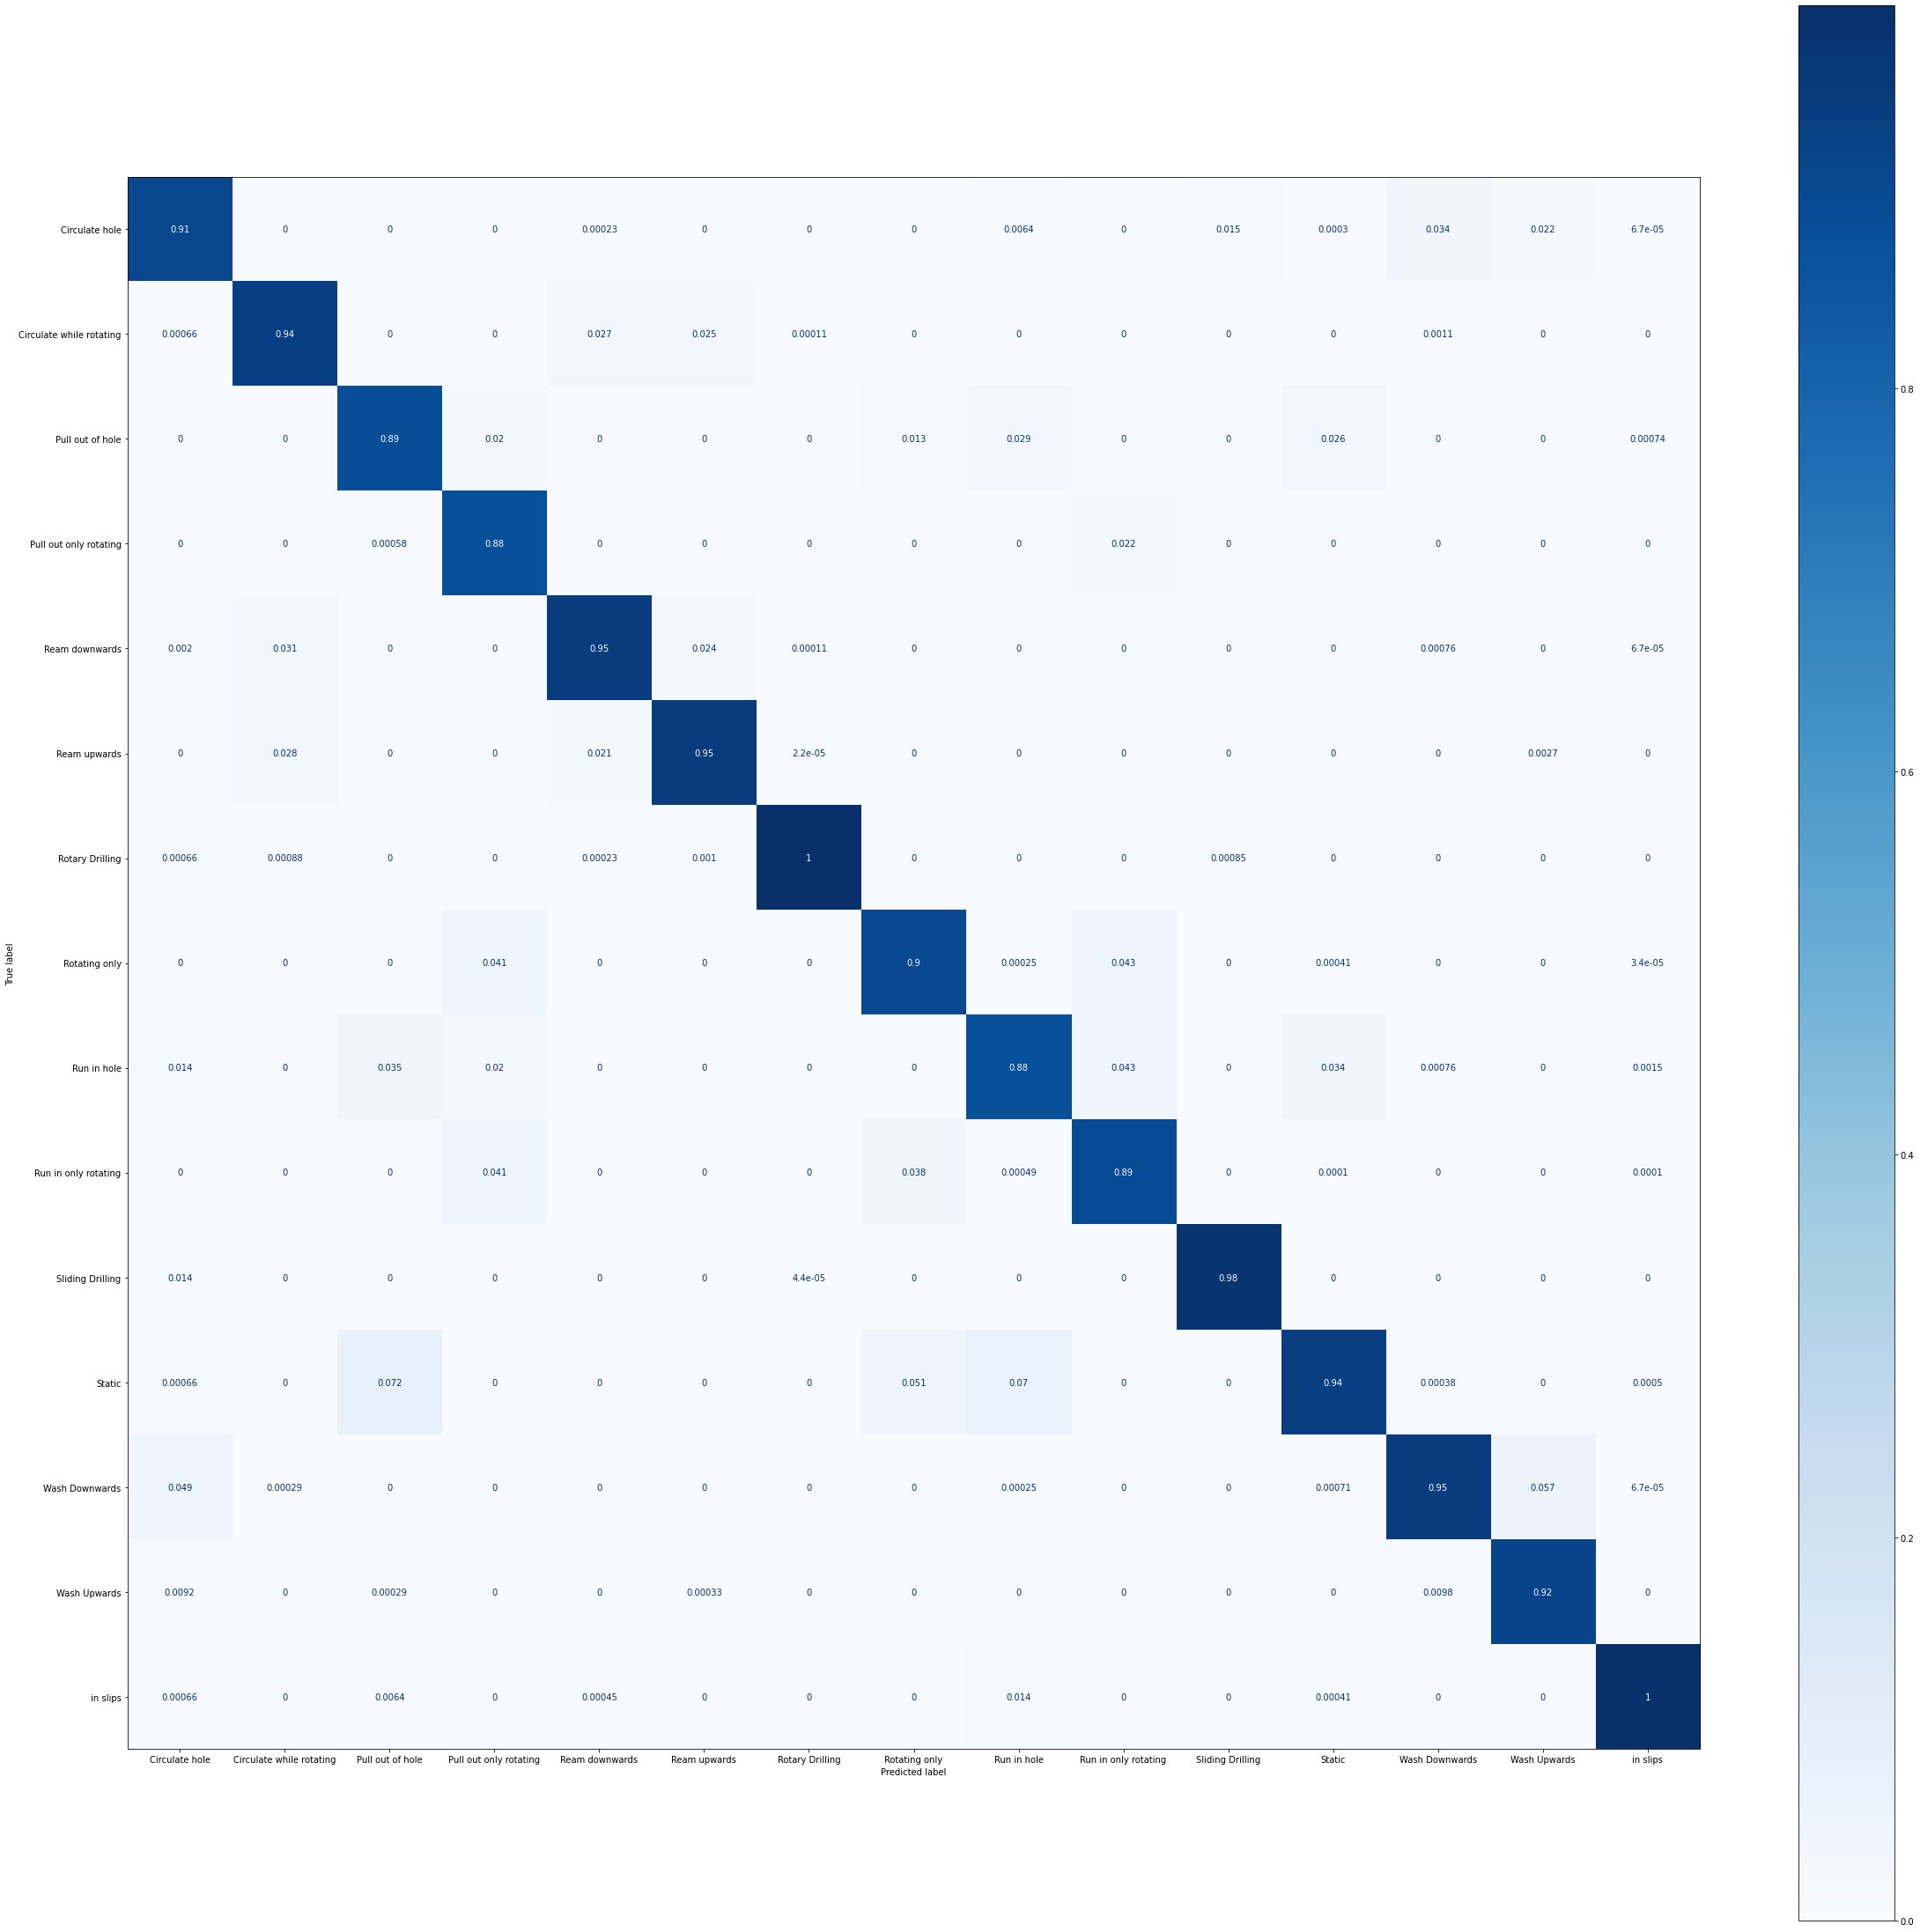

In [15]:
# Confusion matrix KNN
fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(neigh, X_test , y_test, normalize='pred',cmap=plt.cm.Blues, ax=ax)

**Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
loanTree # it shows the default parameters
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [18]:
predTree = loanTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

['in slips' 'in slips' 'Rotary Drilling' 'in slips' 'in slips']
['in slips' 'in slips' 'Rotary Drilling' 'in slips' 'in slips']


In [19]:
k=30
mean_dec = np.zeros((k-1))
std_dec = np.zeros((k-1))

for n in range(1,k):
    #Train Model and Predict 
    dectree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    dectree.fit(X_train, y_train)
    yhat_dec = dectree.predict(X_test)
    mean_dec[n-1] = np.mean(yhat_dec==y_test)
    std_dec[n-1]=np.std(yhat_dec==y_test)/np.sqrt(yhat_dec.shape[0])

mean_dec

array([0.68599389, 0.79177645, 0.8437543 , 0.85007023, 0.86621806,
       0.8810256 , 0.89588822, 0.90807025, 0.91930672, 0.92688032,
       0.93396737, 0.94130229, 0.94860049, 0.95384234, 0.95976352,
       0.96428932, 0.96855808, 0.97178948, 0.97384583, 0.97591136,
       0.97739854, 0.97850933, 0.97928964, 0.97989553, 0.9806024 ,
       0.9802811 , 0.9806483 , 0.98056568, 0.98084108])

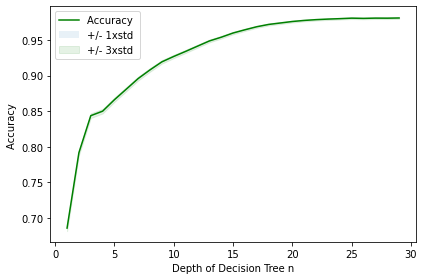

The best accuracy was with 0.9808410828873323 with k= 29


In [20]:
plt.plot(range(1,k),mean_dec,'g')
plt.fill_between(range(1,k),mean_dec - 1 * std_dec,mean_dec + 1 * std_dec, alpha=0.10)
plt.fill_between(range(1,k),mean_dec - 3 * std_dec,mean_dec + 3 * std_dec, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth of Decision Tree n')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_dec.max(), "with k=", mean_dec.argmax()+1)

In [21]:
dec_acc = accuracy_score(y_test, yhat_dec)
print( "The best accuracy was at", mean_dec.max(), "and max_depth of" ,mean_dec.argmax()+1 )
print()
print(classification_report(y_test, yhat_dec))

The best accuracy was at 0.9808410828873323 and max_depth of 29

                          precision    recall  f1-score   support

          Circulate hole       0.94      0.92      0.93      1536
Circulate while rotating       0.94      0.95      0.95      3405
        Pull out of hole       0.90      0.89      0.89      3446
  Pull out only rotating       1.00      0.96      0.98        46
          Ream downwards       0.97      0.97      0.97      4391
            Ream upwards       0.96      0.95      0.95      3055
         Rotary Drilling       1.00      1.00      1.00     45052
           Rotating only       0.90      0.93      0.91        81
             Run in hole       0.89      0.90      0.90      4085
    Run in only rotating       0.88      0.88      0.88        52
        Sliding Drilling       0.98      0.98      0.98      1184
                  Static       0.94      0.94      0.94      9790
          Wash Downwards       0.96      0.97      0.96      2625
          

c:\Users\fmazl\anaconda3\envs\pytest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


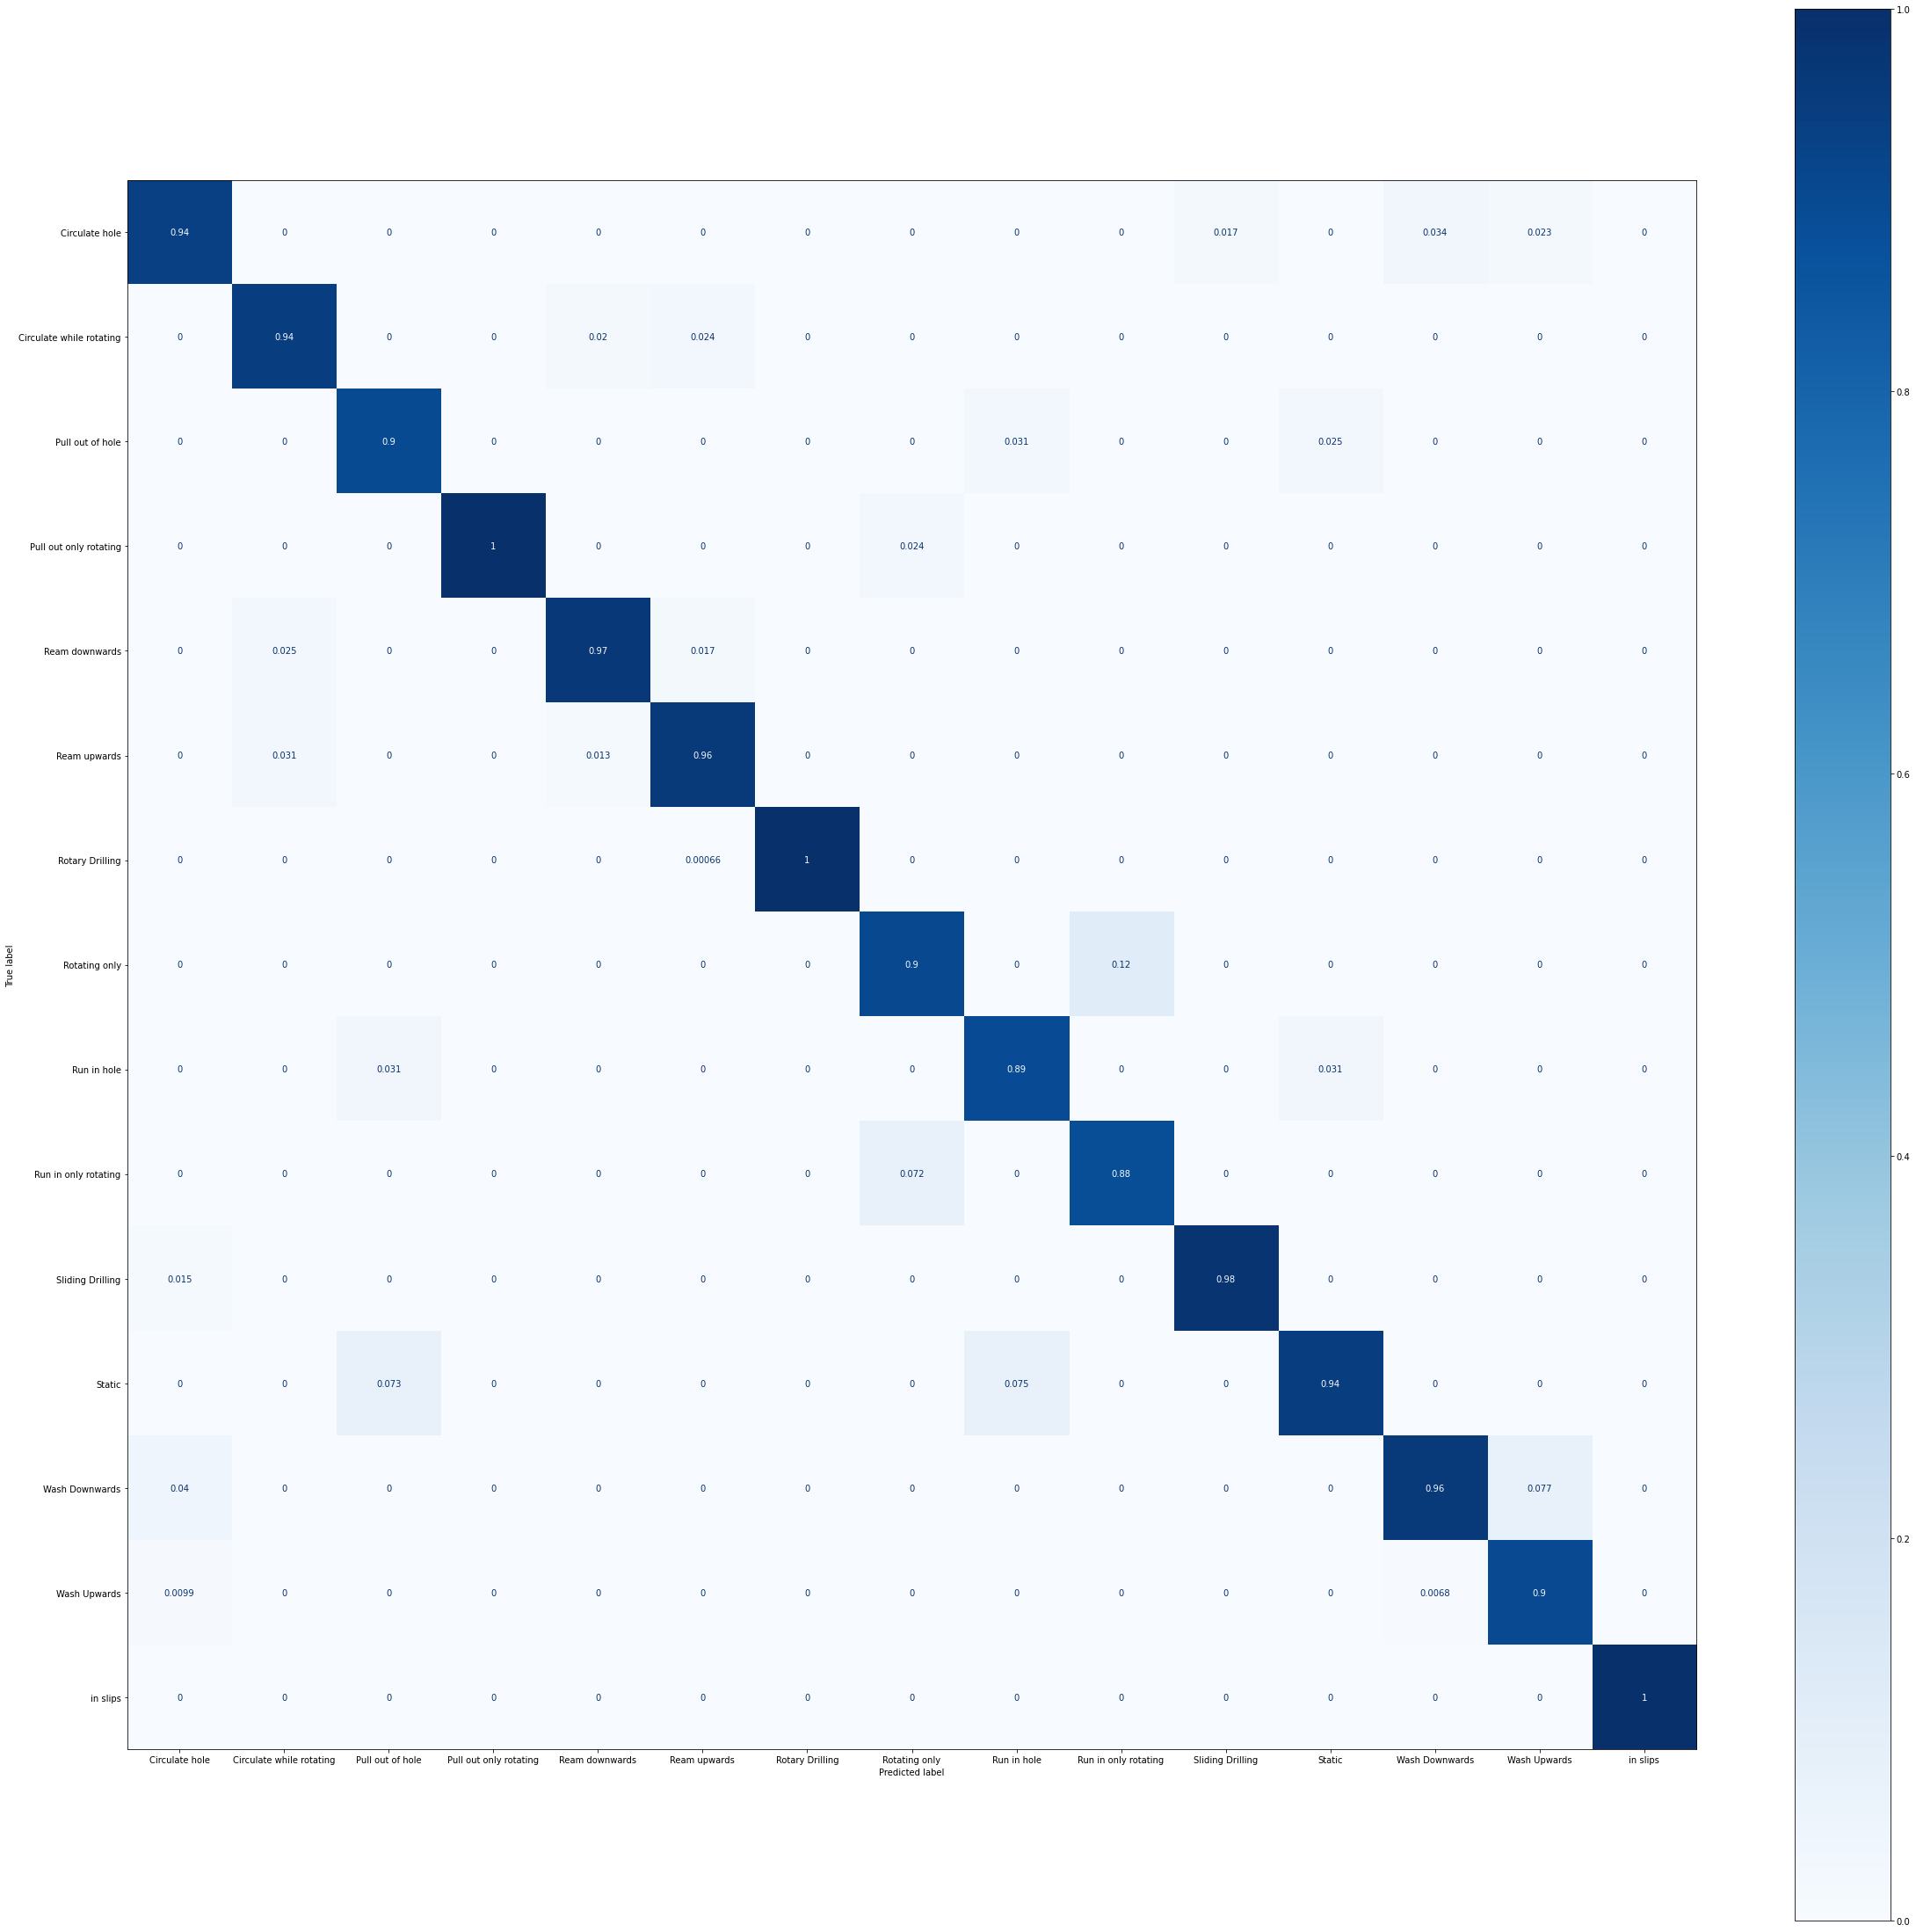

In [22]:
# Confusion matrix decision tree
fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(dectree, X_test , y_test, normalize='pred',cmap=plt.cm.Blues, ax=ax)


Test Decision Tree Model with k

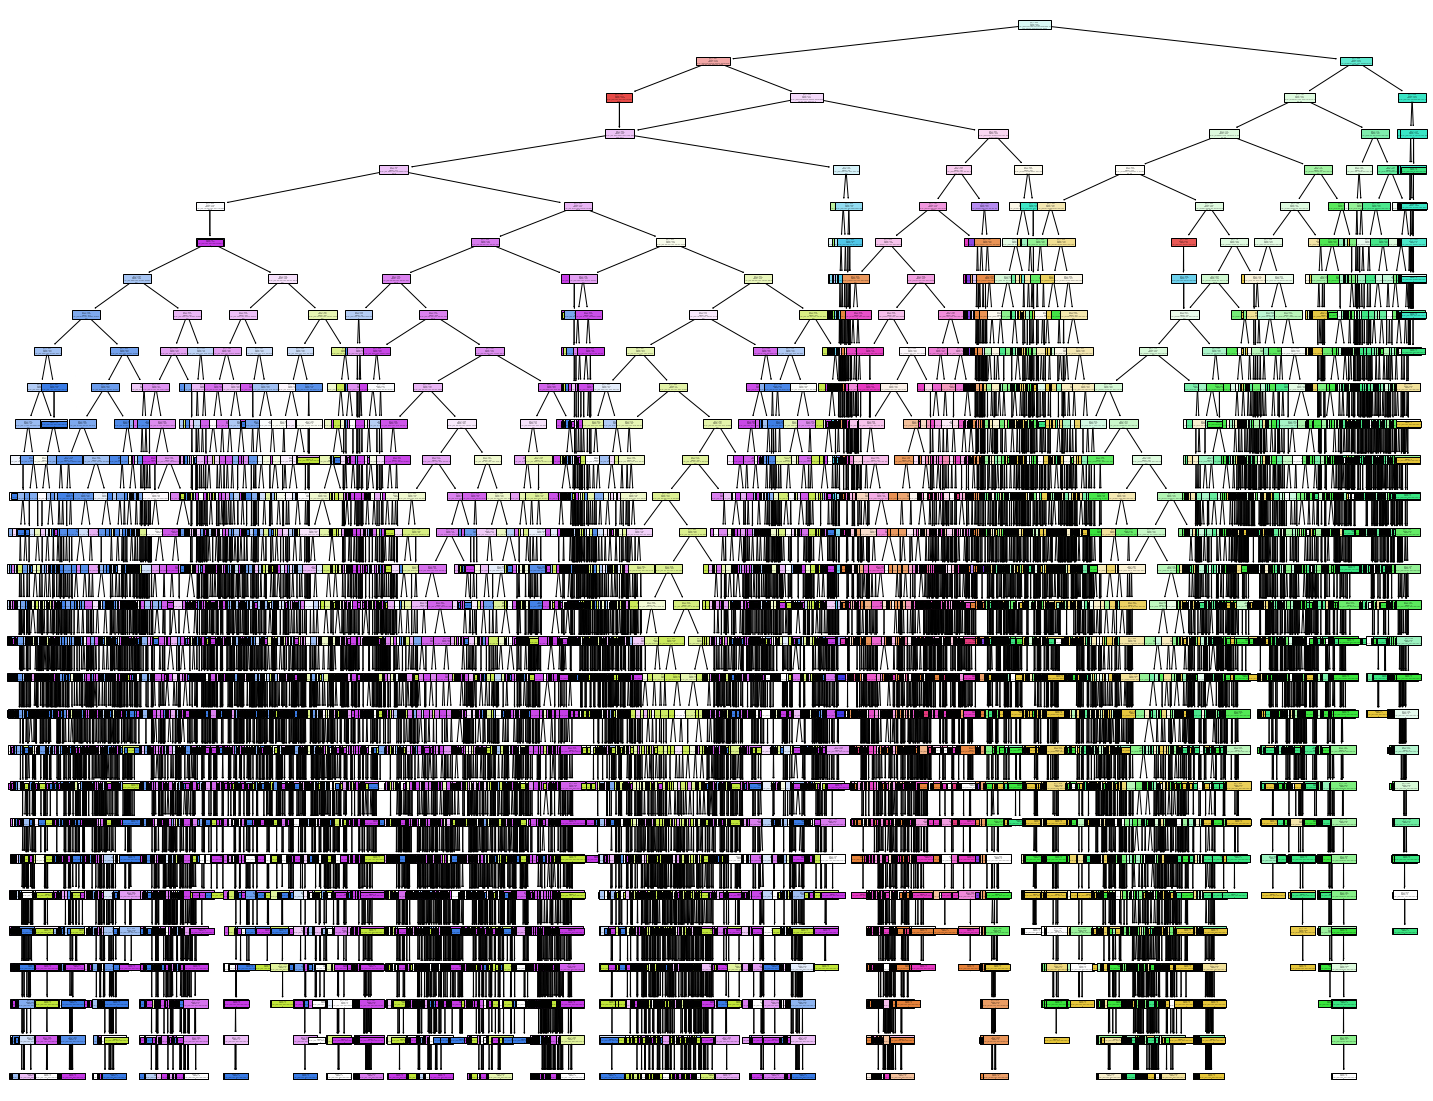

In [46]:
#visualize DT model
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dectree,filled=True)

Save Decision Tree Model

In [ ]:
import pickle 
dt_filename = Path(r"C:\Users\fmazl\Documents\ibm\volve\test\models\dt_model.sav")

dt = pickle.dump(dectree, open(dt_filename,'wb'))

**Support Vector Machine**

SVM not suitable for large dataset. Run at own risk

In [ ]:
#from sklearn import svm
#clf = svm.SVC(kernel='rbf',probability=True)
#clf.fit(X_train, y_train) 
#yhat_svm = clf.predict(X_test)
#print(yhat_svm [0:5])
#print(y_test[0:5])

**Logistic Regression**


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [24]:
#train LR
#liblinear small datasets, multiclass problems newton-cg, sag,saga,lbfgs
LR = LogisticRegression(C=1, solver='newton-cg').fit(X_train,y_train)
#LR = LogisticRegression(C=1,class_weight='balanced', solver='newton-cg').fit(X_train,y_train)
LR
yhat_LR = LR.predict(X_test)


In [25]:
#Predict probabilities
yhat_lrprob = LR.predict_proba(X_test)

In [26]:
y_test

array(['in slips', 'in slips', 'Rotary Drilling', ..., 'Rotary Drilling',
       'Rotary Drilling', 'in slips'], dtype=object)

c:\Users\fmazl\anaconda3\envs\pytest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


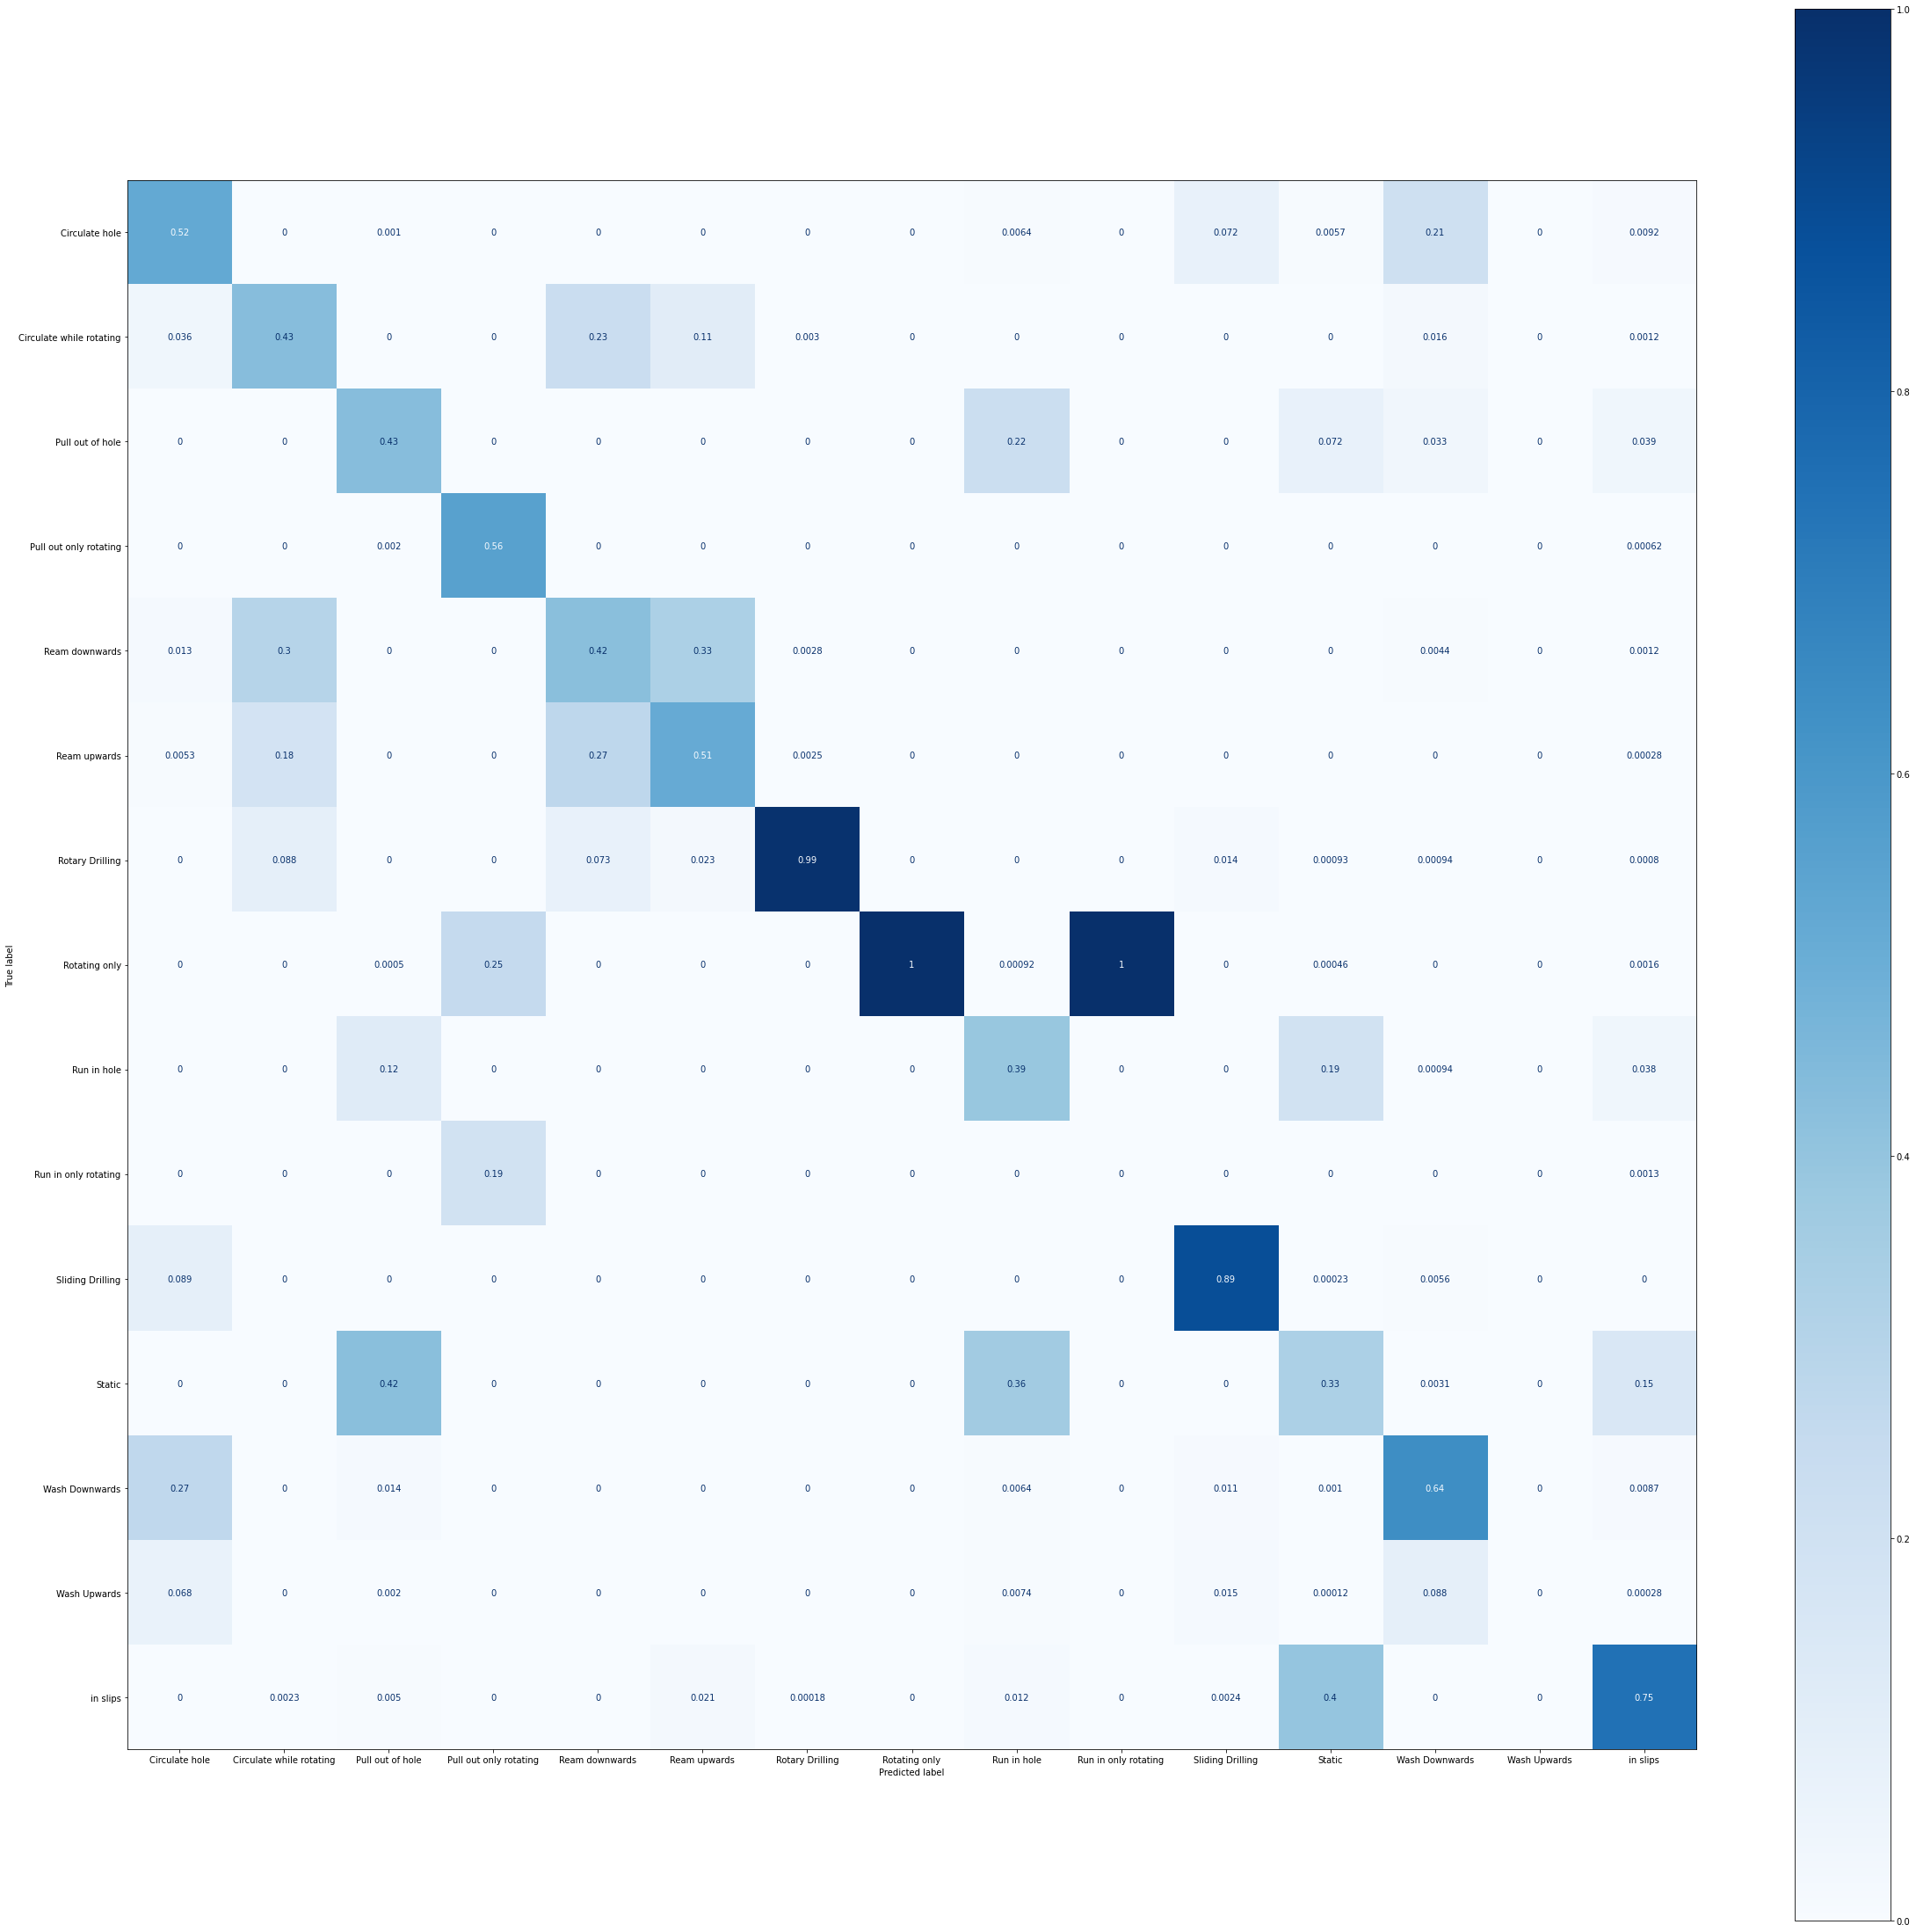

In [27]:
#print(confusion_matrix(y_test, yhat_LR))
cnf_matrix_LR = confusion_matrix(y_test, yhat_LR)
np.set_printoptions(precision=2)



fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(LR, X_test , y_test, normalize='pred',cmap=plt.cm.Blues, ax=ax)


In [28]:
print(classification_report(y_test,yhat_LR))

c:\Users\fmazl\anaconda3\envs\pytest\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fmazl\anaconda3\envs\pytest\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

          Circulate hole       0.52      0.25      0.34      1536
Circulate while rotating       0.43      0.43      0.43      3405
        Pull out of hole       0.43      0.25      0.32      3446
  Pull out only rotating       0.56      0.43      0.49        46
          Ream downwards       0.42      0.66      0.52      4391
            Ream upwards       0.51      0.14      0.22      3055
         Rotary Drilling       0.99      0.98      0.99     45052
           Rotating only       1.00      0.09      0.16        81
             Run in hole       0.39      0.21      0.27      4085
    Run in only rotating       0.00      0.00      0.00        52
        Sliding Drilling       0.89      0.93      0.91      1184
                  Static       0.33      0.29      0.31      9790
          Wash Downwards       0.64      0.78      0.70      2625
            Wash Upwards       0.00      0.00      0.00       383
         

c:\Users\fmazl\anaconda3\envs\pytest\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Neural Network Application**

1) Utilize Deep Feedforward Neural Network as test for comparison

X_train, X_test, y_train, y_test

*using exampl from https://www.bmc.com/blogs/keras-neural-network-classification/ 
utilizing keras

In [29]:
np.shape(X_train)

(435723, 9)

In [161]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
import pydot_ng as pydot
import graphviz
from keras.layers import Dense, LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from tensorflow import keras


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

One Hot encoding as ANN needs to use numbers

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (435723, 9) (435723,)
Test set: (108931, 9) (108931,)


In [33]:
 #try not to use this as label encoder needs to be kept as dict for inverse_transform
# prepare input data
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc


def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc



In [ ]:
#y_train = to_categorical(y_train,15)
#y_test = to_categorical(y_test,15)
#y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#print(y_train_enc)
#print(y_test_enc)
#print ('Y_train_enc & y_test_enc shape:', y_train_enc.shape,  y_train_enc.shape)



In [34]:
# prepare input data
#try to make as NOT part of function due to need to recall LE.
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
print(y_train_enc)
print(y_test_enc)
print ('Y_train_enc & y_test_enc shape:', y_train_enc.shape,  y_test_enc.shape)

[14  6  6 ...  6  6  1]
[14 14  6 ...  6  6 14]
Y_train_enc & y_test_enc shape: (435723,) (108931,)


In [35]:
y_test_enc = to_categorical(y_test_enc,15)
y_train_enc = to_categorical(y_train_enc,15)
print(y_train_enc)
print(y_test_enc)
print ('Y_train_enc & y_test_enc shape:', y_train_enc.shape,  y_train_enc.shape)
print('X_train shape:', X_train.shape)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Y_train_enc & y_test_enc shape: (435723, 15) (435723, 15)
X_train shape: (435723, 9)


In [36]:
np.unique(y_train_enc)
print(y_train_enc)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [162]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(512,return_sequences=True, activation='relu', input_shape=(1,9)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Dense(15, activation='softmax'))


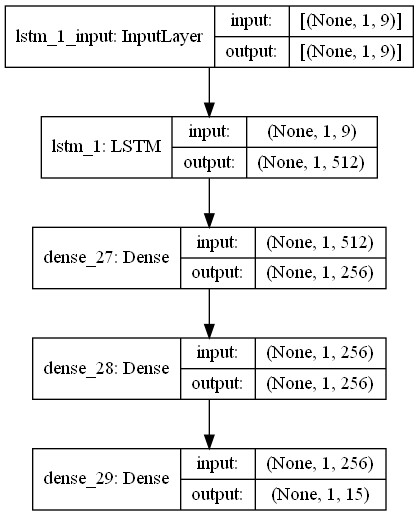

In [164]:
plot_model(model,show_shapes=True, show_layer_names =True)
#plot_model(reconstructed_model,show_shapes=True, show_layer_names =True)

In [ ]:
y_train_enc

In [39]:
X_train = X_train.reshape(-1, 1, 9)
X_test = X_test.reshape(-1, 1, 9)
y_train_enc = y_train_enc.reshape(-1, 1, 15)


print(y_train_enc.shape)
print(X_train.shape)
print(X_test.shape)

(435723, 1, 15)
(435723, 1, 9)
(108931, 1, 9)


In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer='adamax', 
metrics=['categorical_accuracy'])

NNmodel = model.fit(X_train, y_train_enc,epochs=100, batch_size=24, verbose=1)

In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer='adamax', #'RMSprop',
metrics=['categorical_accuracy'])
#model.fit(X_train, y_train_enc,epochs=200, batch_size=100, verbose=1)
NNmodel = model.fit(X_train, y_train_enc,epochs=100, batch_size=24, verbose=1)
#92.5% categorical accuracy / 93.86 without LSTM return sequence epoch 30
# 95.48 % categorical accuracy with return sequence epoch 100
#NNmodel = model.evaluate(X_test, y_test_enc,verbose=1)
#NNmodel2 = model.fit(X_train, y_train_enc,epochs=30, batch_size=2, verbose=1)


#model.save(R"C:\Users\fmazl\Documents\ibm\volve\test\models\NNmodel2.h5")
model.save("NNmodel2")
#model.save(R"C:\Users\fmazl\Documents\ibm\volve\test\models\NNmodel2.h5")
print("saved model to disk")

In [158]:
#retest model/ Reload saved model
reconstructed_model = keras.models.load_model(R"C:\Users\fmazl\Documents\ibm\volve\test\models\NNmodel2.h5")
yhat_LSTM = reconstructed_model.predict(X_train)
print(yhat_LSTM)

#outcome
#yhat_NN = []



(108931, 1, 15)
(108931, 1, 9)


c:\Users\fmazl\anaconda3\envs\pytest\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


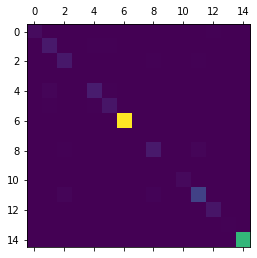

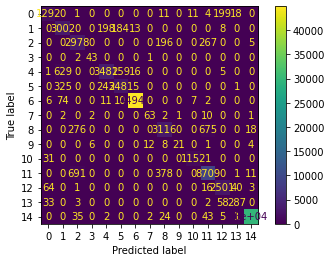

In [49]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

#reshape input
X_test = X_test.reshape(-1, 1, 9)
y_test_enc = y_test_enc.reshape(-1, 1, 15)

print(y_test_enc.shape)
print(X_test.shape)


#load saved model and perform prediction
model=reconstructed_model
Y_pred= model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=2)
Y_pred = le.inverse_transform(Y_pred)

#build confusion matrix
conf_mat = confusion_matrix(y_test,Y_pred)
plt.matshow(conf_mat)
#plot_confusion_matrix(X_test , y_pred, normalize='pred',cmap=plt.cm.Blues, ax=ax)
#plot_confusion_matrix(y_test, Y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [50]:
# relabel model if load saved
#model = reconstructed_model
print(Y_pred)
print(y_test)
#print(Y_pred.shape)
#list(le.classes_)

['in slips' 'in slips' 'Rotary Drilling' ... 'Rotary Drilling'
 'Rotary Drilling' 'in slips']
['in slips' 'in slips' 'Rotary Drilling' ... 'Rotary Drilling'
 'Rotary Drilling' 'in slips']


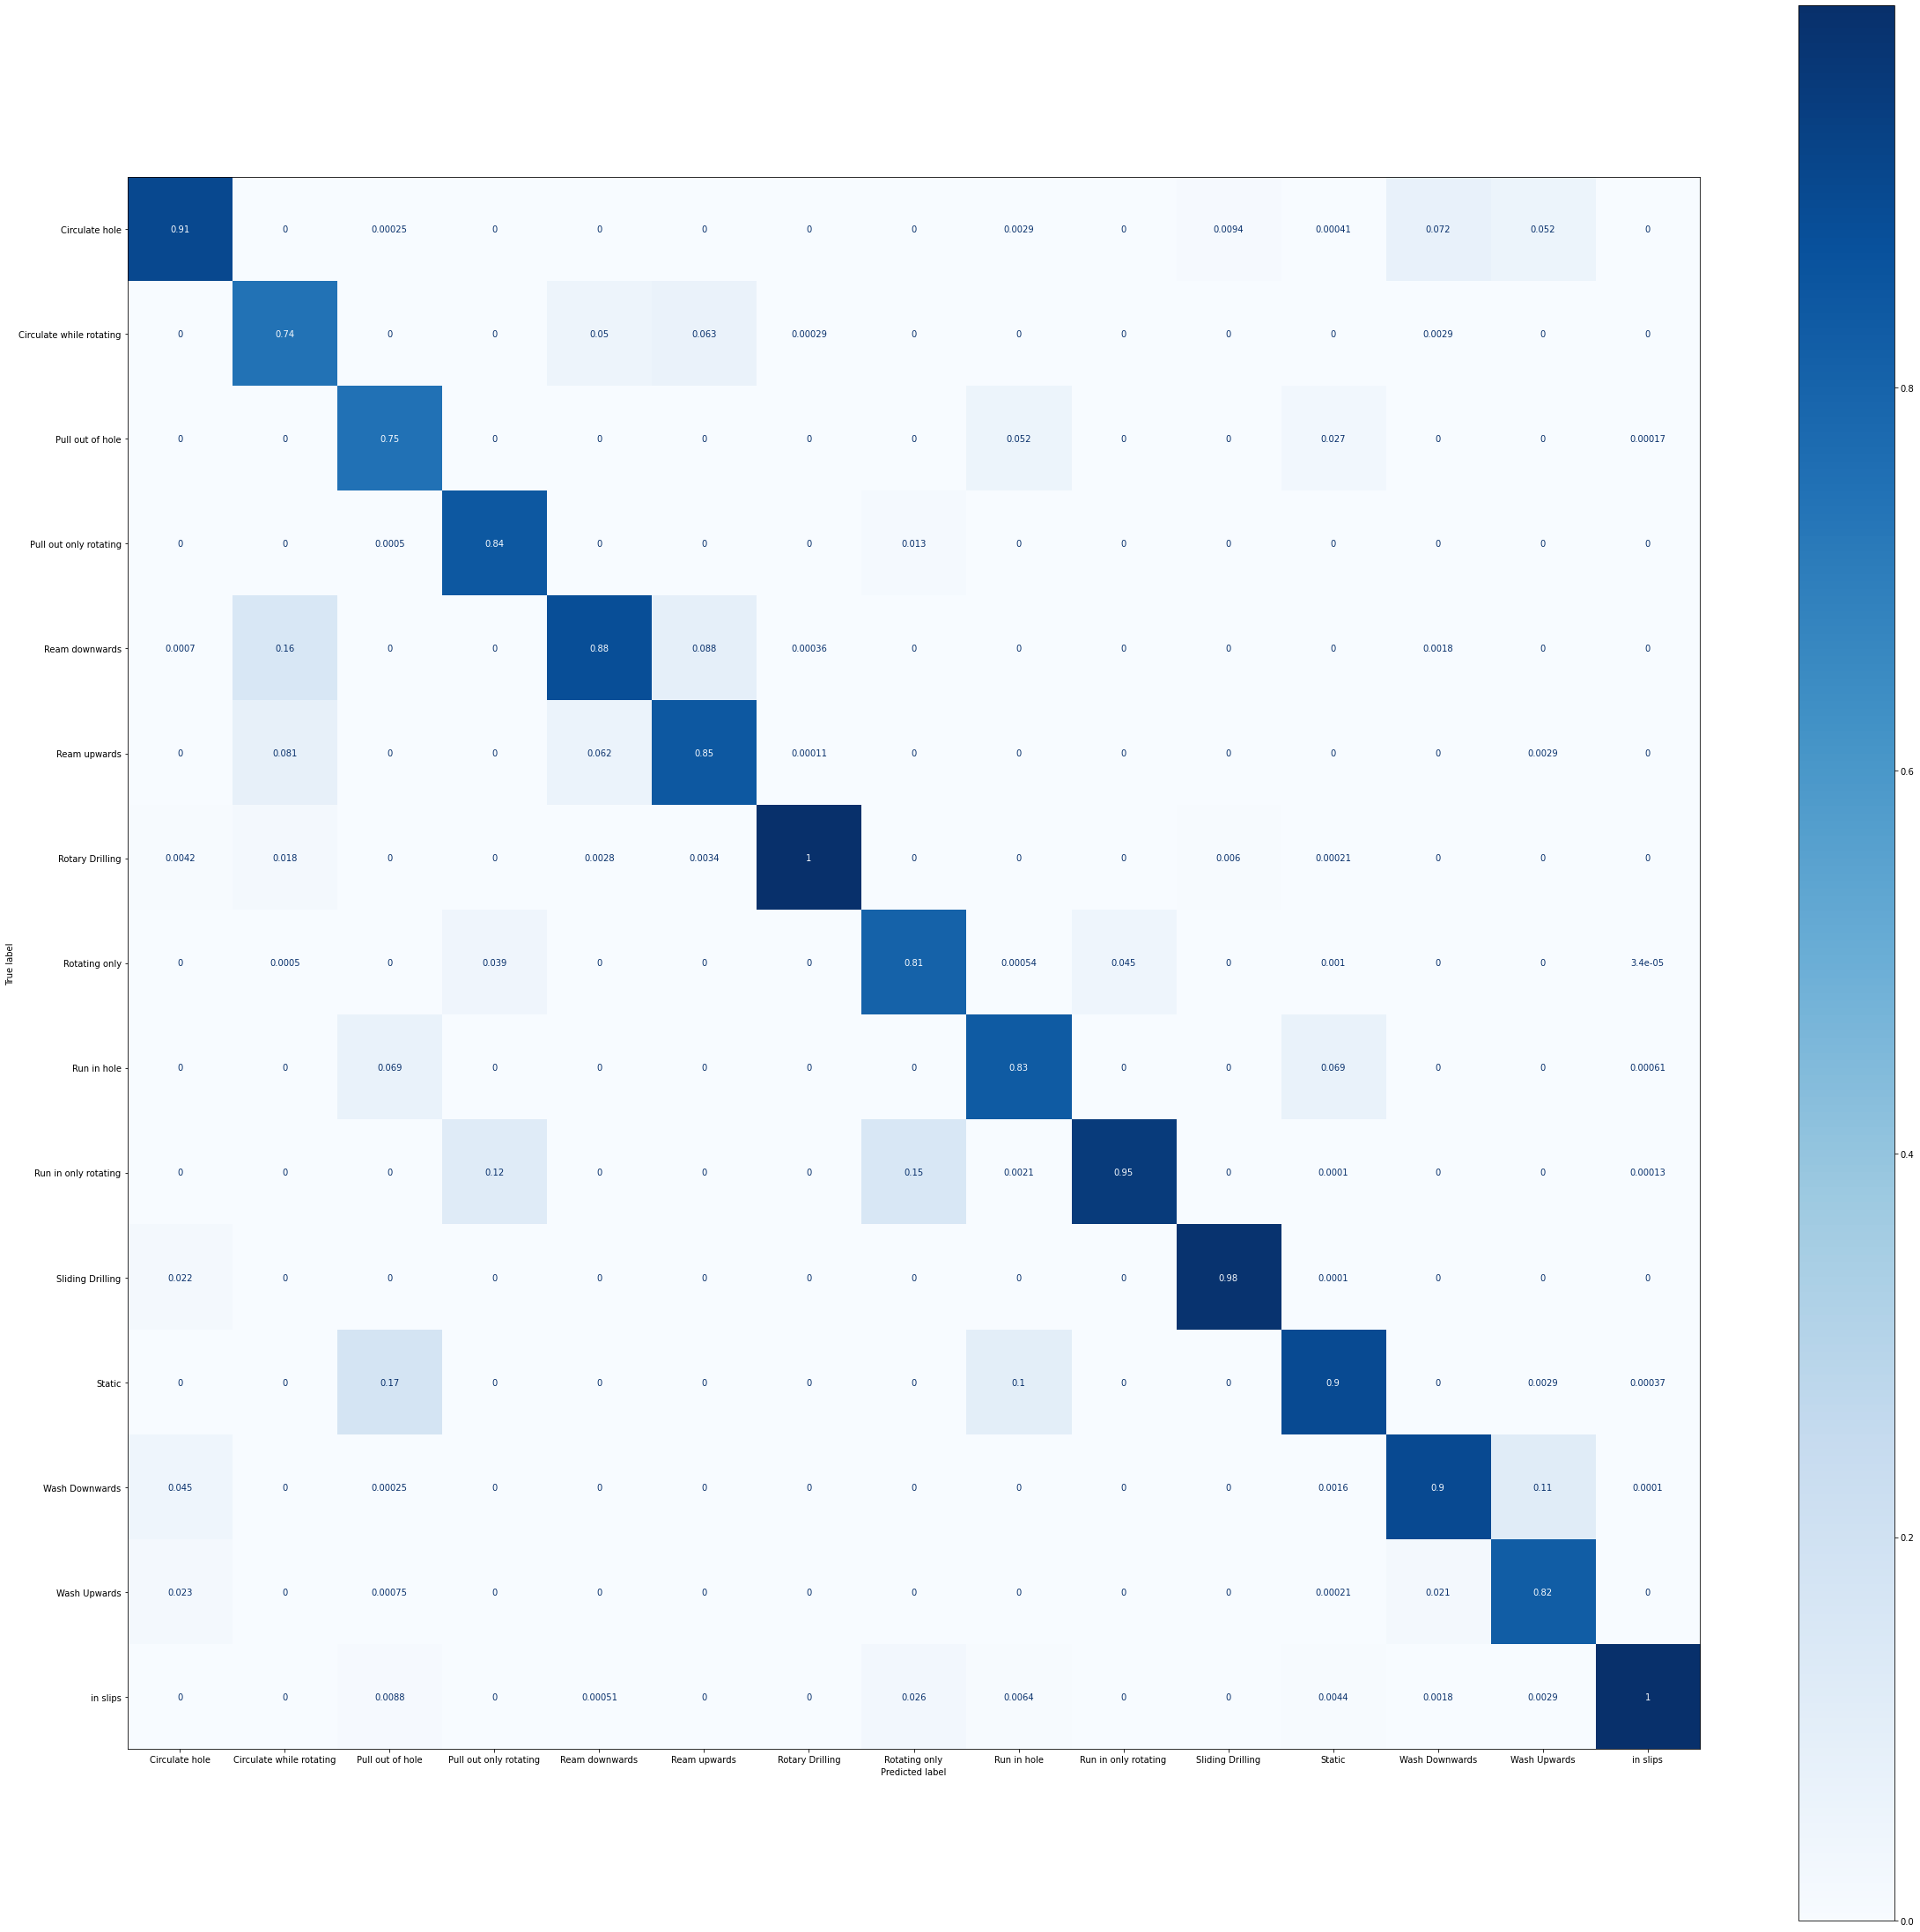

In [51]:
fig, ax = plt.subplots(figsize=(40, 40))
ConfusionMatrixDisplay.from_predictions(y_test,Y_pred,normalize='pred',cmap=plt.cm.Blues, ax=ax)


In [52]:
print(classification_report(y_test,Y_pred))

                          precision    recall  f1-score   support

          Circulate hole       0.91      0.84      0.87      1536
Circulate while rotating       0.74      0.88      0.81      3405
        Pull out of hole       0.75      0.86      0.80      3446
  Pull out only rotating       0.84      0.93      0.89        46
          Ream downwards       0.88      0.79      0.84      4391
            Ream upwards       0.85      0.81      0.83      3055
         Rotary Drilling       1.00      1.00      1.00     45052
           Rotating only       0.81      0.78      0.79        81
             Run in hole       0.83      0.76      0.80      4085
    Run in only rotating       0.95      0.40      0.57        52
        Sliding Drilling       0.98      0.97      0.98      1184
                  Static       0.90      0.89      0.89      9790
          Wash Downwards       0.90      0.95      0.93      2625
            Wash Upwards       0.82      0.75      0.79       383
         

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
#model = NNmodel

model.save(R"C:\Users\fmazl\Documents\ibm\volve\test\models\NNmodel2-1.h5")
#NNmodel.save("NNmodel2")
#model.save(R"C:\Users\fmazl\Documents\ibm\volve\test\models\NNmodel2.h5")
print("saved model to disk")

try LSTM with multiple time step - sequence classification LSTM / CNN-LSTM
-not complete
https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/

In [199]:
#@title Import Libraries
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [124]:
#check X,y shapes
print(X_train[0:5])
print(y_train[0:5])
print(X_test[0:5])
print(y_test[0:5])

[[[ 1.01  0.41 -0.5  -0.19 -1.03 -0.64 -1.14 -0.99 -0.94]]

 [[-0.21  0.41  0.18 -0.13  0.61  0.46  1.1   1.09  1.01]]

 [[-0.26  0.35 -0.11  0.4   0.61  0.07  1.11  1.1   0.69]]

 [[-1.5  -1.3   0.57  0.29 -0.58 -0.64 -1.14 -1.   -0.94]]

 [[-0.63 -0.06  0.9  -0.85  0.16  1.98  0.87  0.28  1.66]]]
['in slips' 'Rotary Drilling' 'Rotary Drilling' 'Pull out of hole'
 'Rotary Drilling']
[[[-0.84 -0.29  0.29  1.32 -1.11 -0.64 -1.14 -1.   -0.94]]

 [[ 1.01 -0.12 -0.5  -0.28 -0.96 -0.64 -1.14 -1.01 -0.94]]

 [[-0.3   0.32 -0.33 -0.34  0.59 -0.06  0.88  0.72  0.35]]

 [[-0.37 -1.07 -0.5   1.42 -0.96 -0.64 -1.14 -1.02 -0.94]]

 [[-0.37 -1.12 -0.5  -1.14 -0.98 -0.64  0.02 -0.22 -0.94]]]
['in slips' 'in slips' 'Rotary Drilling' 'in slips' 'in slips']


In [125]:
#@title Check GPU

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

GPU device not found


In [202]:


n_timesteps_in = 2
n_features = 9
n_outputs = 15

#define model
model = Sequential()
#model.add(LSTM(512, return_sequences=True,activation='relu', input_shape=(n_timesteps_in,n_features)))
#model.add(TimeDistributed(Dense(1, activation='relu')))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256))
#model.add(Dense(15, activation='softmax'))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_timesteps_in,n_features)))
#model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
#model.add(TimeDistributed(Dropout(0.5)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy',
optimizer='adamax', #'RMSprop',
metrics=['categorical_accuracy'])

#from keras.models import Sequential
#from keras.layers import Dense

#model = Sequential()
#model.add(LSTM(512,return_sequences=True, activation='relu', input_shape=(1,9)))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256))
#model.add(Dense(15, activation='softmax'))

ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node time_distributed_7/conv1d_2/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](time_distributed_7/conv1d_2/conv1d/ExpandDims, time_distributed_7/conv1d_2/conv1d/ExpandDims_1)' with input shapes: [?,1,2,9], [1,3,9,64].

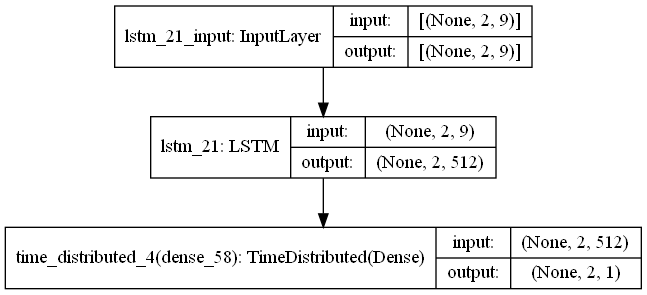

In [197]:
#plot_model(model,show_shapes=True, show_layer_names =True)
plot_model(model,show_shapes=True, show_layer_names =True)

In [ ]:
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	#X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	#limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	#y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs

    

	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

In [ ]:
#train LSTM
for epoch in range(100):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)

**Feature Importance**

1) KNN
2) Decision Tree

4) Logistic Regression
5) ANN?

In [56]:
#attribute for reference
Feature

,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm
0,917.789978,909.799988,0.0,9.010000,62.080324,0.0,0.00000,197.000005,0.0
1,917.789978,909.799988,0.0,9.010000,62.059929,0.0,0.00000,195.000008,0.0
2,917.789978,909.799988,0.0,9.010000,62.141505,0.0,0.00000,205.999993,0.0
3,917.789978,909.799988,0.0,9.010000,62.263873,0.0,0.00000,187.000000,0.0
4,917.789978,909.799988,0.0,9.010000,62.294464,0.0,0.00000,185.999999,0.0
...,...,...,...,...,...,...,...,...,...
544649,2591.060059,1535.459961,0.0,16.809999,179.286512,0.0,776.53003,1228.999995,0.0
544650,2591.060059,1535.459961,0.0,16.809999,179.215124,0.0,776.53003,1243.000028,0.0
544651,2591.060059,1535.459961,0.0,16.809999,178.939797,0.0,776.53003,1244.999983,0.0
544652,2591.060059,1535.459961,0.0,16.809999,178.858217,0.0,776.53003,1268.000031,0.0


In [ ]:
#Import permutation_importance pack

from sklearn.inspection import permutation_importance

In [79]:
# check permutation importance by model
# Model 1 : KNN

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

SyntaxError: invalid syntax (<ipython-input-79-e6e62811461d>, line 5)

Activity: 0


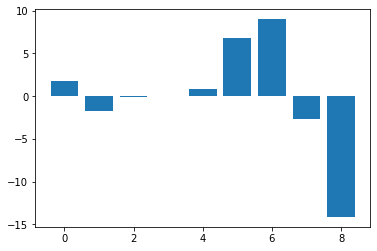

Activity: 1


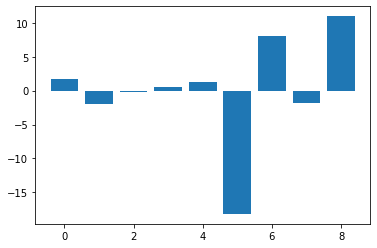

Activity: 2


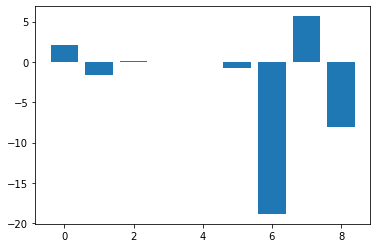

Activity: 3


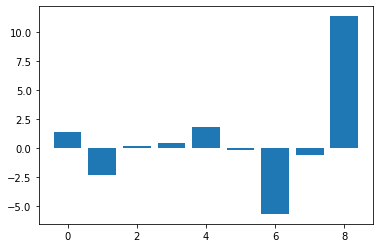

Activity: 4


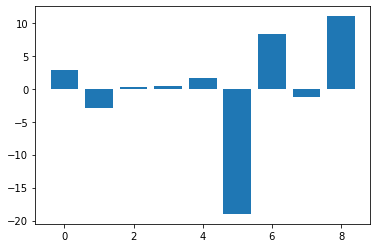

Activity: 5


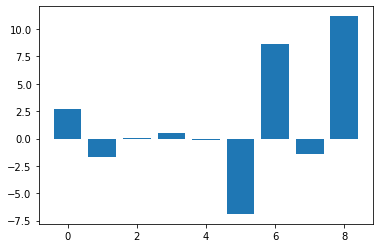

Activity: 6


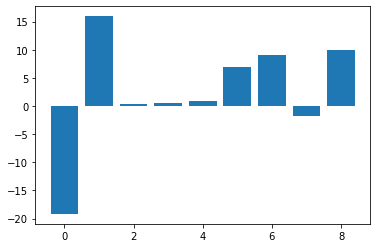

Activity: 7


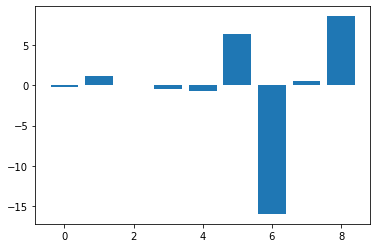

Activity: 8


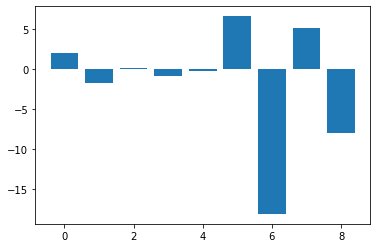

Activity: 9


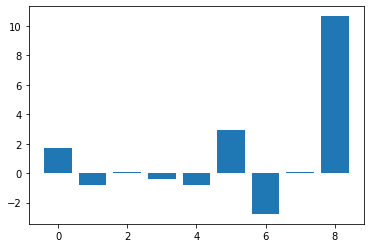

Activity: 10


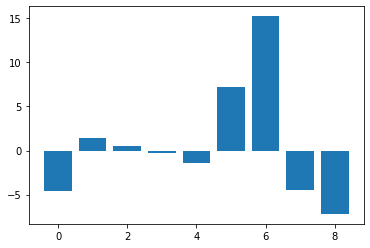

Activity: 11


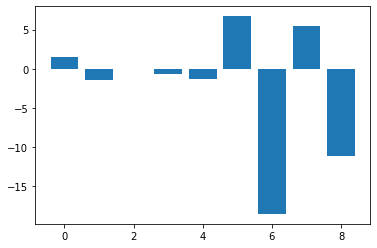

Activity: 12


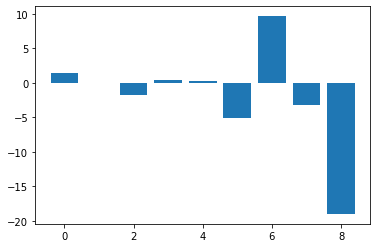

Activity: 13


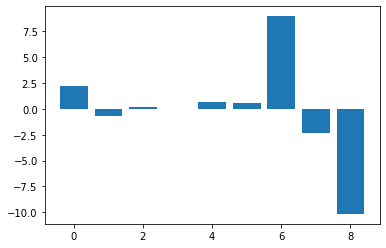

Activity: 14


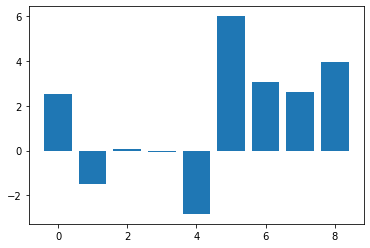

,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm
Circulate hole,1.826728,-1.760232,-0.141168,-0.001384,0.868868,6.752026,8.999437,-2.638785,-14.128995
Circulate while rotating,1.74948,-1.977052,-0.175896,0.513318,1.336136,-18.186185,8.089342,-1.843743,10.976615
Pull out of hole,2.048415,-1.615705,0.114188,-0.07374,-0.047543,-0.759259,-18.851745,5.656969,-8.076689
Pull out only rotating,1.383529,-2.26851,0.16095,0.488878,1.802994,-0.103869,-5.653555,-0.561639,11.37992
Ream downwards,2.793829,-2.930752,0.257066,0.425915,1.656073,-18.998617,8.26525,-1.270488,11.01374
Ream upwards,2.700372,-1.694705,0.086793,0.495347,-0.10094,-6.88447,8.640782,-1.414817,11.164066
Rotary Drilling,-19.165183,15.93675,0.363273,0.46648,0.955136,6.873254,8.969936,-1.762672,9.898574
Rotating only,-0.248537,1.145369,0.06207,-0.403905,-0.713943,6.361681,-16.002453,0.594174,8.627828
Run in hole,2.023952,-1.782285,0.173248,-0.836023,-0.250056,6.554814,-18.052715,5.104087,-8.01549
Run in only rotating,1.716116,-0.832463,0.074934,-0.384236,-0.816987,2.961409,-2.768758,0.059851,10.65079


In [113]:
#check feature importance logictic regresssion
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
#DMEA - m	DBTM - m	ROP5 -	BPOS - m	HKLD - kkgf	SWOB - kkgf	TFLO - L/min	SPPA - kPa	RPM - rpm
KNN_feature = pd.DataFrame(columns = ['DMEA - m', 'DBTM - m','ROP5 -','BPOS - m','HKLD - kkgf','SWOB - kkgf','TFLO - L/min',
							'SPPA - kPa','RPM - rpm'], index = ['Circulate hole ','Circulate while rotating','Pull out of hole','Pull out only rotating','Ream downwards','Ream upwards ','Rotary Drilling','Rotating only',
'Run in hole','Run in only rotating','Sliding Drilling','Static','Wash Downwards','Wash Upwards','in slips'])


# get importance
for u in range(0,15) :
	importance = LR.coef_[u]
	
	# summarize feature importance
	for i,v in enumerate(importance):
		#print('Feature: %0d, Score: %.5f' % (i,v))
				KNN_feature.iloc[u,i] = v
			
# plot feature importance
	print('Activity: %0d' % u )
	pyplot.bar([x for x in range(len(importance))], importance)
	pyplot.show()

KNN_feature

**Output Results into dataframe**


run DT model on 1.csv

In [117]:
print(X)
print(y)
df.head()

[[-0.8  -0.25 -0.5  ... -1.14 -1.   -0.94]
 [-0.8  -0.25 -0.5  ... -1.14 -1.01 -0.94]
 [-0.8  -0.25 -0.5  ... -1.14 -1.   -0.94]
 ...
 [ 1.01  0.5  -0.5  ... -0.75 -0.91 -0.94]
 [ 1.01  0.5  -0.5  ... -0.75 -0.91 -0.94]
 [ 1.01  0.5  -0.5  ... -0.75 -0.9  -0.94]]
['in slips' 'in slips' 'in slips' ... 'Wash Downwards' 'Wash Downwards'
 'Wash Downwards']


,TIME - s,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class
0,2007-12-17 05:10:35.040000+00:00,917.789978,909.799988,0.0,9.01,62.080324,0.0,0.0,197.000005,0.0,0,1,0,0,1,1001,in slips
1,2007-12-17 05:10:39.014000+00:00,917.789978,909.799988,0.0,9.01,62.059929,0.0,0.0,195.000008,0.0,0,1,0,0,1,1001,in slips
2,2007-12-17 05:10:44.026000+00:00,917.789978,909.799988,0.0,9.01,62.141505,0.0,0.0,205.999993,0.0,0,1,0,0,1,1001,in slips
3,2007-12-17 05:10:48+00:00,917.789978,909.799988,0.0,9.01,62.263873,0.0,0.0,187.000000,0.0,0,1,0,0,1,1001,in slips
4,2007-12-17 05:10:53.011000+00:00,917.789978,909.799988,0.0,9.01,62.294464,0.0,0.0,185.999999,0.0,0,1,0,0,1,1001,in slips


In [119]:
yhat_dec_full = dectree.predict(X)

In [120]:
df2 = df
df2['state_class_dectree'] = yhat_dec_full
df2.head()

,TIME - s,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class,state_class_dectree
0,2007-12-17 05:10:35.040000+00:00,917.789978,909.799988,0.0,9.01,62.080324,0.0,0.0,197.000005,0.0,0,1,0,0,1,1001,in slips,in slips
1,2007-12-17 05:10:39.014000+00:00,917.789978,909.799988,0.0,9.01,62.059929,0.0,0.0,195.000008,0.0,0,1,0,0,1,1001,in slips,in slips
2,2007-12-17 05:10:44.026000+00:00,917.789978,909.799988,0.0,9.01,62.141505,0.0,0.0,205.999993,0.0,0,1,0,0,1,1001,in slips,in slips
3,2007-12-17 05:10:48+00:00,917.789978,909.799988,0.0,9.01,62.263873,0.0,0.0,187.000000,0.0,0,1,0,0,1,1001,in slips,in slips
4,2007-12-17 05:10:53.011000+00:00,917.789978,909.799988,0.0,9.01,62.294464,0.0,0.0,185.999999,0.0,0,1,0,0,1,1001,in slips,in slips


In [123]:
#save appended dataframe
from openpyxl.utils.dataframe import dataframe_to_rows
#rows = dataframe_to_rows(df2)

#full_path = os.path.join(directory, filename)
#WITSML_file = r"C:\Users\fmazl\Documents\ibm\volve\test\f15\3\00001.xml"
save_directory = r"C:\Users\fmazl\Documents\ibm\volve\test\others\output"
#savepath =  r'C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\3\ '

#df.to_csv(savepath + r'\File Name.csv')
#i = 1
#filenum = str(i) + (r'.xlsx')
#filenum = str(i) + (r'.csv')
#savepath = savepath + (filenum) + (r'.csv')
filename = 'testfilewithlabelandmodel'
savepath = os.path.join(save_directory,filename)
print(savepath)

#wb.save(savepath + '.xls')
#df_depth.to_excel(savepath + '.xlsx', index=False)
df2.to_csv(savepath + '.csv' , index=False)

C:\Users\fmazl\Documents\ibm\volve\test\others\output\testfilewithlabelandmodel
